In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
!python3 -c 'import tensorflow as tf; print(tf.__version__)'  # for Python 3

/home/ys/anaconda3/envs/tfg/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ys/anaconda3/envs/tfg/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ys/anaconda3/envs/tfg/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ys/anaconda3/envs/tfg/lib/python3.7/site-packages/tensorflow/

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # Visible devices must be set at program startup
    print(e)

AttributeError: module 'tensorflow' has no attribute 'config'

In [4]:
# To turn on memory growth for a specific GPU, use the following code 
# prior to allocating any tensors or executing any ops.gpus = tf.config.experimental.list_physical_devices('GPU')

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

AttributeError: module 'tensorflow' has no attribute 'config'

In [5]:
# train = pd.read_csv('Google_Stock_Price_Train.csv')
# train

In [6]:
train = pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date',parse_dates=True) #CHANGE from /Data -> /DATA
train #1258 rows

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [7]:
train.rename(columns ={'Open':'Price'}, inplace=True)
train

,Price,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [8]:
train1 = train['Price']
train1

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2016-12-23    790.90
2016-12-27    790.68
2016-12-28    793.70
2016-12-29    783.33
2016-12-30    782.75
Name: Price, Length: 1258, dtype: float64

In [10]:
train = train[['Price']]
# print(train.index) #DatetimeIndex(['2012-01-03',...)]
train #1258

,Price
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2016-12-23,790.90
2016-12-27,790.68
2016-12-28,793.70


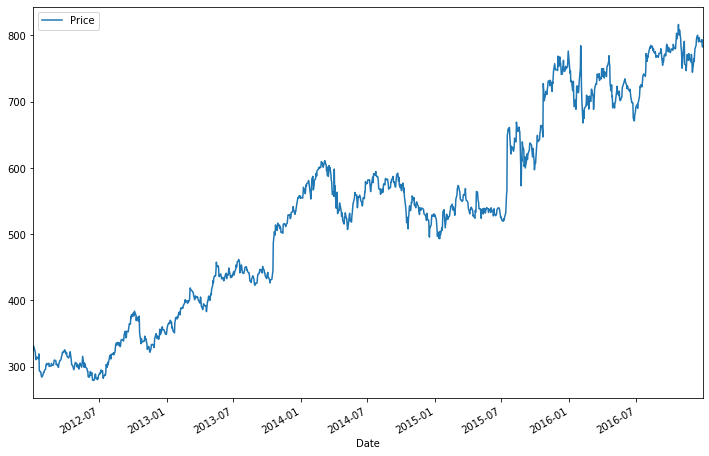

In [31]:
train.plot(figsize = (12,8))

### Train Test Split -> already splited csv file

In [32]:
#test1 = pd.read_csv('Google_Stock_Price_Test.csv')
# test1

In [33]:
test = pd.read_csv('Google_Stock_Price_Test.csv', index_col='Date', parse_dates = True) 
test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [34]:
test  = test.rename(columns={'Open':'Price'})
test #20 rows

,Price,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [35]:
test = test[['Price']]
test #20

,Price
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40
2017-01-10,807.86
2017-01-11,805.00
2017-01-12,807.14
2017-01-13,807.48


In [36]:
df = pd.concat((train, test), axis=0) # 1258 + 20 = 1278
df #1278

,Price
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2017-01-25,829.62
2017-01-26,837.81
2017-01-27,834.71


## From this time on, We use train_split, test_split instead of trian, test !!
### split train test again from concated dataframe : test size for 80 since length is 60, test size >= length

In [37]:
len(df)

1278

##### Data is daily, let's forcast 2 and 2/3 months(80 days) into the future(test_size is 80 days)

In [38]:
len(df)- 80

1198

In [39]:
test_size  = 80

In [40]:
test_ind = len(df) - test_size
test_ind

1198

In [41]:
train_split = df.iloc[:test_ind] #df.iloc[:1198] -> 1198
print(train_split.shape)
train_split

(1198, 1)


,Price
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04
...,...
2016-09-29,781.44
2016-09-30,776.33
2016-10-03,774.25


In [42]:
test_split = df.iloc[test_ind:] #df.iloc[1198:] -> 80
print(test_split.shape)
test_split

(80, 1)


,Price
Date,
2016-10-06,779.00
2016-10-07,779.66
2016-10-10,777.71
2016-10-11,786.66
2016-10-12,783.76
...,...
2017-01-25,829.62
2017-01-26,837.81
2017-01-27,834.71


### Scale Data 
* apply for DataFrame, transform for Series

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [46]:
scaled_train = scaler.transform(train_split)
print(scaled_train.shape)
scaled_train #size 1198

(1198, 1)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.92106928],
       [0.92438053],
       [0.93048218]])

In [47]:
scaled_test = scaler.transform(test_split)
print(scaled_test.shape)
scaled_test  #size 80

(80, 1)


array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

## Time Series Generator

In [48]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

#### Create generator from scaled_train dataset.


In [49]:
# Let's redefine to get 60 days back and then predict the next day open stock price.
length = 60
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [50]:
print("len(generator) : ",len(generator)) #1138 generator, each generator has array with 60 elements.
print(type(generator))

len(generator) :  1138
<class 'tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator'>


In [51]:
# What does the first batch look like?
X,y = generator[0]

In [52]:
print(X)
## In rnn_stock_predict: #if i == 60, [0:60, 0], 61 [1:61, 0], 62 [2:62, 0],,, 1257 [1197:1257, 0]
## [0:60, 0] -> [0,0],,,[59,0] -> [60,0] not incl, which is y_train.
print(f'Given the Array: \n{X.flatten()}') #60  
print(f'Predict this y: \n {y}') # 1 ##[60,0], [61,0], [62,0],,,[1257,0]

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]
  [0.06568569]
  [0.06109085]
  [0.06639259]
  [0.0614257 ]
  [0.07474514]
  [0.02797827]
  [0.02379269]
  [0.02409033]
  [0.0159238 ]
  [0.01078949]
  [0.00967334]
  [0.01642607]
  [0.02100231]
  [0.02280676]
  [0.02273235]
  [0.02810849]
  [0.03212665]
  [0.0433812 ]
  [0.04475779]
  [0.04790163]
  [0.0440695 ]
  [0.04648783]
  [0.04745517]
  [0.04873875]
  [0.03936305]
  [0.04137213]
  [0.04034898]
  [0.04784582]
  [0.04325099]
  [0.04356723]
  [0.04286033]
  [0.04602277]
  [0.05398467]
  [0.05738894]
  [0.05714711]
  [0.05569611]
  [0.04421832]
  [0.04514845]
  [0.04605997]
  [0.04412531]
  [0.03675869]
  [0.04486941]
  [0.05065481]
  [0.05214302]
  [0.05612397]
  [0.05818885]
  [0.06540665]
  [0.06882953]
  [0.07243843]
  [0.07993526]
  [0.07846566]
  [0.08034452]
  [0.08497656]]]
Given the Array: 
[0.08581368 0.09701243 0.09433366 0.09156187 0.07984225 0.0643277
 0.0585423  0.

### Create the Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
# We're only using one feature in our time series , column name : Price
n_features = 1

In [55]:
# define model
model = Sequential()
#large neuron for LSTM such as 100
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))#100 output dimension,
model.add(Dense(1)) # one predictable output
model.compile(optimizer='adam', loss='mse') #contious variable.

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [57]:
len(scaled_test)

80

In [58]:
print("your length chosen for your batches : ",length)

your length chosen for your batches :  60


In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
# early_stop = EarlyStopping(monitor='val_loss',patience=3) 
early_stop = EarlyStopping(monitor='val_loss',patience=2) 

#### Create validation_generator from scaled_test dataset.

In [61]:
#produce batches for training/validation.(return A Sequence instance.)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [62]:
len(validation_generator) #create 20 batches : len(scaled_test): 80, length=60-> 80-60 =20, 20/1(batch_size)=> 20 

20

In [63]:
#check validation_generator's first elemnt out of 60
X_vg, y_vg = validation_generator[0]
print(X_vg.shape)
print(f"X_vg[0] length : {len(X_vg[0])} \n X_vg : \n { X_vg}")
print("y_vg : \n", y_vg)

(1, 60, 1)
X_vg[0] length : 60 
 X_vg : 
 [[[0.9299055 ]
  [0.93113327]
  [0.92750577]
  [0.94415507]
  [0.93876032]
  [0.93403527]
  [0.93483518]
  [0.9313937 ]
  [0.94636878]
  [0.96569685]
  [0.97510976]
  [0.95966962]
  [0.97808617]
  [1.        ]
  [0.98076494]
  [0.97083116]
  [0.98450406]
  [0.96054394]
  [0.9371419 ]
  [0.92841729]
  [0.90804747]
  [0.8771858 ]
  [0.92153434]
  [0.93809063]
  [0.93165414]
  [0.95254483]
  [0.88812412]
  [0.88637547]
  [0.87032145]
  [0.88563137]
  [0.90743359]
  [0.91571173]
  [0.89941588]
  [0.91805566]
  [0.9089404 ]
  [0.9024853 ]
  [0.89456061]
  [0.91600938]
  [0.9132934 ]
  [0.88979835]
  [0.86589404]
  [0.89030062]
  [0.90335962]
  [0.89642086]
  [0.91777662]
  [0.93176576]
  [0.94114145]
  [0.95762334]
  [0.96413424]
  [0.96402262]
  [0.96971501]
  [0.95077759]
  [0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]
  [0.93688146]]]
y_vg : 
 [[0.92955205]]


#### fit_generator model with generator(X,y) and validation_generator(X,y)

In [64]:
# fit model by model.fit_generator(generator, validation_generator=validation_generator)
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator,
                   callbacks=[early_stop])

In [67]:
help(model.fit_generator)

Help on method fit_generator in module tensorflow.python.keras.engine.training:

fit_generator(generator, steps_per_epoch=None, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, validation_freq=1, class_weight=None, max_queue_size=10, workers=1, use_multiprocessing=False, shuffle=True, initial_epoch=0) method of tensorflow.python.keras.engine.sequential.Sequential instance
    Fits the model on data yielded batch-by-batch by a Python generator.
    
    The generator is run in parallel to the model, for efficiency.
    For instance, this allows you to do real-time data augmentation
    on images on CPU in parallel to training your model on GPU.
    
    The use of `keras.utils.Sequence` guarantees the ordering
    and guarantees the single use of every input per epoch when
    using `use_multiprocessing=True`.
    
    Arguments:
        generator: A generator or an instance of `Sequence`
          (`keras.utils.Sequence`)
            object in order to 

In [15]:
# # fit model by model.fit_generator(generator, validation_generator=validation_generator)
# model.fit_generator(generator,epochs=100,
#                     validation_data=validation_generator)
                  

In [69]:
losses = pd.DataFrame(model.history.history)

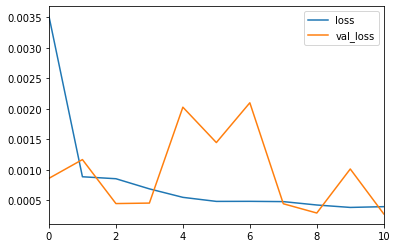

In [70]:
losses.plot()

## Evaluate on Test Data

In [71]:
first_eval_batch = scaled_train[-length:]  # scaled_train[-60:]
# X_vg, y_vg = validation_generator[0] -> X_vg.shape -> (1,60,1)
print(first_eval_batch.shape) #(60, 1) -> need to be (1,60,1) for prediction 
n_input = length #60

(60, 1)


In [72]:
current_batch = first_eval_batch.reshape((1, n_input, n_features)) #(1,60,1) <- X.shape of generator[0] is (1,60,1)

In [73]:
print(current_batch.shape)
current_batch # scaled_train[-60:] , nd.array with 60 elements from scaled_train

(1, 60, 1)


array([[[0.82688444],
        [0.82308952],
        [0.83080958],
        [0.82519161],
        [0.83854826],
        [0.85238857],
        [0.85802515],
        [0.86081554],
        [0.85860183],
        [0.85556961],
        [0.85415582],
        [0.87045167],
        [0.91820448],
        [0.89658829],
        [0.91072624],
        [0.90791726],
        [0.91729295],
        [0.92019495],
        [0.93548627],
        [0.93381204],
        [0.93874172],
        [0.94106704],
        [0.93455614],
        [0.93874172],
        [0.93232383],
        [0.92678027],
        [0.93178436],
        [0.92246447],
        [0.91924622],
        [0.92335739],
        [0.91424213],
        [0.90758241],
        [0.91130292],
        [0.91081926],
        [0.91191681],
        [0.90760101],
        [0.91176799],
        [0.91876256],
        [0.91958107],
        [0.93176576],
        [0.92914279],
        [0.91334921],
        [0.88550115],
        [0.90289456],
        [0.89383511],
        [0

In [74]:
#predict value based on X, training dataset. <- predict based on model trained with TimeseriesGenerator data instance
print(model.predict(current_batch).shape) #2-d
model.predict(current_batch)  #2-d

(1, 1)


array([[0.90458864]], dtype=float32)

In [75]:
#actual y value.
scaled_test[0] 

array([0.9299055])

In [76]:
print( model.predict(current_batch)[0].shape )#1-d no.array 
model.predict(current_batch)[0]

(1,)


array([0.90458864], dtype=float32)

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [77]:
len(test_split)

80

In [78]:
test_predictions = []

first_eval_batch = scaled_train[-length:] 
current_batch = first_eval_batch.reshape((1, length, n_features))
print("* original current_batch :\n", current_batch) #60
print("==============================================================")

for i in range(len(test_split)): #80 
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    # model.predict(current_batch)[0], 1-d array(1,)[0.49245596] <-
    # <- model.predict(current_batch),2d (1,1)[[0.49245596]]
    current_pred = model.predict(current_batch)[0]
    print(f"*index {i}: current_pred : {model.predict(current_batch)[0]}")
    print('----------------------')
    # store prediction 
    test_predictions.append(current_pred) #list consist 18 np.array(1,)
    print(f"*test_predictions : \n",test_predictions)
    print("---------------------------------")
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) #[[[0.49245596]]], 3-d(1,1,1)
    print("current_batch :\n", current_batch)
    print("****************************************")

* original current_batch :
 [[[0.82688444]
  [0.82308952]
  [0.83080958]
  [0.82519161]
  [0.83854826]
  [0.85238857]
  [0.85802515]
  [0.86081554]
  [0.85860183]
  [0.85556961]
  [0.85415582]
  [0.87045167]
  [0.91820448]
  [0.89658829]
  [0.91072624]
  [0.90791726]
  [0.91729295]
  [0.92019495]
  [0.93548627]
  [0.93381204]
  [0.93874172]
  [0.94106704]
  [0.93455614]
  [0.93874172]
  [0.93232383]
  [0.92678027]
  [0.93178436]
  [0.92246447]
  [0.91924622]
  [0.92335739]
  [0.91424213]
  [0.90758241]
  [0.91130292]
  [0.91081926]
  [0.91191681]
  [0.90760101]
  [0.91176799]
  [0.91876256]
  [0.91958107]
  [0.93176576]
  [0.92914279]
  [0.91334921]
  [0.88550115]
  [0.90289456]
  [0.89383511]
  [0.89993675]
  [0.91269812]
  [0.917665  ]
  [0.91130292]
  [0.91811147]
  [0.93176576]
  [0.94402485]
  [0.93686286]
  [0.9233946 ]
  [0.9277662 ]
  [0.93444453]
  [0.92493861]
  [0.92106928]
  [0.92438053]
  [0.93048218]]]
*index 0: current_pred : [0.90458864]
----------------------
*test_pre

*index 7: current_pred : [0.78474045]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32)]
---------------------------------
current_batch :
 [[[0.85860183]
  [0.85556961]
  [0.85415582]
  [0.87045167]
  [0.91820448]
  [0.89658829]
  [0.91072624]
  [0.90791726]
  [0.91729295]
  [0.92019495]
  [0.93548627]
  [0.93381204]
  [0.93874172]
  [0.94106704]
  [0.93455614]
  [0.93874172]
  [0.93232383]
  [0.92678027]
  [0.93178436]
  [0.92246447]
  [0.91924622]
  [0.92335739]
  [0.91424213]
  [0.90758241]
  [0.91130292]
  [0.91081926]
  [0.91191681]
  [0.90760101]
  [0.91176799]
  [0.91876256]
  [0.91958107]
  [0.93176576]
  [0.92914279]
  [0.91334921]
  [0.88550115]
  [0.90289456]
  [0.89383511]
  [0.89993675]
  [0.912698

*index 13: current_pred : [0.7117333]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32)]
---------------------------------
current_batch :
 [[[0.91072624]
  [0.90791726]
  [0.91729295]
  [0.92019495]
  [0.93548627]
  [0.93381204]
  [0.93874172]
  [0.94106704]
  [0.93455614]
  [0.93874172]
  [0.93232383]
  [0.92678027]
  [0.93178436]
  [0.92246447]
  [0.91924622]
  [0.92335739]
  [0.91424213]
  [0.90758241]
  [0.91130292]
  [0.91081926]
  [0.91191681]
  [0.90760101]
  [0.91176799]
  [0.91876256]
  [0.91958

*index 19: current_pred : [0.64903474]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32)]
---------------------------------
current_batch :
 [[[0.93874172]
  [0.94106704]
  [0.93455614]
  [0.93874172]
  [0.93232383]
  [0.92678027]
  [0.93178436]
  [0.92246447]
  [0.91924622]
  [0.92335739]
  [0.91

*index 25: current_pred : [0.5946352]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float3

*index 29: current_pred : [0.5622845]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float3

*index 33: current_pred : [0.5324992]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float3

*index 37: current_pred : [0.50494903]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 41: current_pred : [0.47952056]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 45: current_pred : [0.45600528]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 49: current_pred : [0.43421435]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 53: current_pred : [0.41398543]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 57: current_pred : [0.39517632]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 61: current_pred : [0.37766126]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 65: current_pred : [0.36132893]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 69: current_pred : [0.34607974]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 73: current_pred : [0.33171424]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

*index 77: current_pred : [0.31814355]
----------------------
*test_predictions : 
 [array([0.90458864], dtype=float32), array([0.88439566], dtype=float32), array([0.8642108], dtype=float32), array([0.8455976], dtype=float32), array([0.82863283], dtype=float32), array([0.813025], dtype=float32), array([0.79847044], dtype=float32), array([0.78474045], dtype=float32), array([0.7716269], dtype=float32), array([0.75897884], dtype=float32), array([0.7467037], dtype=float32), array([0.7347528], dtype=float32), array([0.7231007], dtype=float32), array([0.7117333], dtype=float32), array([0.7006409], dtype=float32), array([0.6898156], dtype=float32), array([0.67924976], dtype=float32), array([0.6689359], dtype=float32), array([0.6588667], dtype=float32), array([0.64903474], dtype=float32), array([0.6394328], dtype=float32), array([0.6300537], dtype=float32), array([0.62089086], dtype=float32), array([0.61193764], dtype=float32), array([0.60318774], dtype=float32), array([0.5946352], dtype=float

## Inverse Transformations and Compare

In [79]:
print( len(test_predictions) ) 
print( test_predictions[0].shape)
test_predictions # 1 list consists of 80 np.array 

80
(1,)


[array([0.90458864], dtype=float32),
 array([0.88439566], dtype=float32),
 array([0.8642108], dtype=float32),
 array([0.8455976], dtype=float32),
 array([0.82863283], dtype=float32),
 array([0.813025], dtype=float32),
 array([0.79847044], dtype=float32),
 array([0.78474045], dtype=float32),
 array([0.7716269], dtype=float32),
 array([0.75897884], dtype=float32),
 array([0.7467037], dtype=float32),
 array([0.7347528], dtype=float32),
 array([0.7231007], dtype=float32),
 array([0.7117333], dtype=float32),
 array([0.7006409], dtype=float32),
 array([0.6898156], dtype=float32),
 array([0.67924976], dtype=float32),
 array([0.6689359], dtype=float32),
 array([0.6588667], dtype=float32),
 array([0.64903474], dtype=float32),
 array([0.6394328], dtype=float32),
 array([0.6300537], dtype=float32),
 array([0.62089086], dtype=float32),
 array([0.61193764], dtype=float32),
 array([0.60318774], dtype=float32),
 array([0.5946352], dtype=float32),
 array([0.586274], dtype=float32),
 array([0.5780988],

In [84]:
true_predictions = scaler.inverse_transform(test_predictions) # scaled value -> actual value 
print(true_predictions.shape)
true_predictions #1 np array, it's shape is (80,1) 

(80, 1)


array([[765.39066918],
       [754.53573044],
       [743.68514928],
       [733.67945918],
       [724.55986494],
       [716.16971777],
       [708.3457684 ],
       [700.96507523],
       [693.91575083],
       [687.11666721],
       [680.51803255],
       [674.09370132],
       [667.83002403],
       [661.71934286],
       [655.75653125],
       [649.93726364],
       [644.25750286],
       [638.7131797 ],
       [633.30038514],
       [628.01511405],
       [622.85348946],
       [617.81166644],
       [612.88608844],
       [608.07319889],
       [603.36960143],
       [598.77209197],
       [594.2774664 ],
       [589.88277693],
       [585.58510783],
       [581.38167152],
       [577.26795022],
       [573.22750685],
       [569.26117449],
       [565.3702668 ],
       [561.55536055],
       [557.81616735],
       [554.15166189],
       [550.56040232],
       [547.04049822],
       [543.59021937],
       [540.20769138],
       [536.89107186],
       [533.6386947 ],
       [530

In [85]:
# IGNORE WARNINGS
test_split['Predictions'] = true_predictions

/home/ys/anaconda3/envs/tfg/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
test_split

,Price,Predictions
Date,,
2016-10-06,779.00,765.390669
2016-10-07,779.66,754.535730
2016-10-10,777.71,743.685149
2016-10-11,786.66,733.679459
2016-10-12,783.76,724.559865
...,...,...
2017-01-25,829.62,453.734587
2017-01-26,837.81,451.924411
2017-01-27,834.71,450.141245


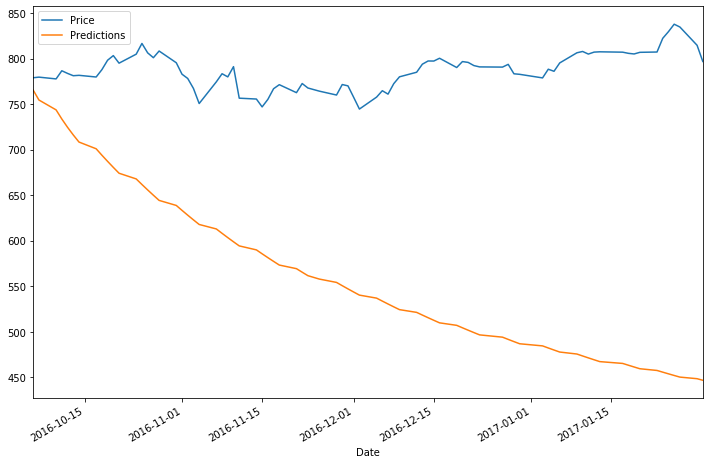

In [87]:
test_split.plot(figsize=(12,8))

In [ ]:
#############################original soulution from lecture #####################

In [ ]:
#index slice dataFrame : all row, column index 1=='open'(instead 1 -> 1:2) 
training_set = df.iloc[:, 1:2].values

In [ ]:
print(dataset_train.shape)
dataset_train.head()

In [ ]:
print(training_set.shape)
training_set #numpy.ndarray

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set)

In [ ]:
 1257-60

In [ ]:
 1257-1197

In [ ]:
print(training_set_scaled.shape)
training_set_scaled # 2-d np.array

In [ ]:
print(training_set_scaled[:,0].shape)
training_set_scaled[:,0] #make 1-d np.array with 60 elements

In [ ]:
# Test 
# Creating a data structure('open' price) with 60 timesteps and 1 output
X_train1 = []
y_train1 = []
for i in range(60, 65): #from 60 to 65-1 
    print("* i : ", i)
    X_train1.append(training_set_scaled[i-60:i, 0])#if i == 60, [0:60, 0], 61 [1:61, 0], 62 [2:62, 0],,, 64 [4:64, 0]
    print(f"*training_set_scaled[{i-60}:{i}, 0] \n")
    print(training_set_scaled[i-60:i, 0])
    
    print(f"*X_train1.append(training_set_scaled[{i-60}:{i}, 0])")
    print("* X_train1 - number of appended list : ",len(X_train1)) #list
  
    print("----------------------------------------------------\n")
    y_train1.append(training_set_scaled[i, 0]) #[60,0], [61,0], [62,0],,,[64,0]
    print(f"**training_set_scaled[{i}, 0]")
    print(training_set_scaled[i, 0])
    
    print(f"**y_train1.append(training_set_scaled[{i}, 0]) ")
    print("** y_train1 - number of appended list : ",len(y_train1)) #list
    
    print("================================================================")
X_train1, y_train1 = np.array(X_train1), np.array(y_train1)


In [ ]:
print(X_train1.shape) #np.array
X_train1

In [ ]:
print(y_train1.shape) #np.array
y_train1

In [ ]:
# Creating a data structure('open' price) with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258): #from 60 to 1258-1 
    X_train.append(training_set_scaled[i-60:i, 0])#if i == 60, [0:60, 0], 61 [1:61, 0], 62 [2:62, 0],,, 1257 [1197:1257, 0]
    y_train.append(training_set_scaled[i, 0]) #[60,0], [61,0], [62,0],,,[1257,0]
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
print(X_train.shape) 
X_train # scaled 'open' price with 60 time stamp

In [ ]:
print(y_train.shape)
y_train

In [ ]:
# Reshaping:(1198, 60) -> (1198, 60, 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #(1198,60,1)

In [ ]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()

In [ ]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) # 60,1
regressor.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [ ]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [ ]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [ ]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [ ]:
# Part 3 - Making the predictions and visualising the results using Test csv file.(20, 6)

# Getting the real stock price of 2017

# dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
print(dataset_test.shape)
dataset_test.head()

In [ ]:
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price.shape)
real_stock_price

In [ ]:
dataset_train['Open'] #1258

In [ ]:
dataset_test['Open'] #20

In [ ]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) #1258 + 20 => 1278
print(dataset_total.shape)
dataset_total #1278

In [ ]:
print(len(dataset_total))
print(len(dataset_test))
1278 - 20 - 60

In [ ]:
#[1278 - 20 - 60] =>  dataset_total[1198:].values
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(inputs.shape) #1-d
print(len(inputs))
inputs #dataset_total[1198:].values #80

In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape) #2-d
print(inputs)
print("-----------------")
inputs = sc.transform(inputs)
print(inputs.shape)
inputs

In [ ]:
X_test = []
for i in range(60, 80):
    print(f"* inputs[{i-60}:{i}, 0] \n")
    print(inputs[i-60:i, 0])
    X_test.append(inputs[i-60:i, 0])
    print(f"** X_test.append(inputs[{i-60}:{i}, 0]) \n")
    print("--------------------------------------------------------------")


In [ ]:
X_test = np.array(X_test)
print(X_test.shape) #(20, 60)
print(X_test)
print("----------------------------------------------------")

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape) #(20, 60, 1)
print(X_test)


In [ ]:
predicted_stock_price = regressor.predict(X_test)#(20, 60, 1) -> (20, 1)
print(predicted_stock_price.shape)
predicted_stock_price


In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)
predicted_stock_price

### reference:  LSTM model 
```
test_size = 24
length  = 18
n_features = 1
train = df[:-test_size]
test = df[-test_size:]
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

```

```
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)
```
```
model = Sequential()
model.add(LSTM(100,input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
```

```
early_stop = EarlyStopping(monitor='val_loss',patience=3) 
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)
model.fit_generator(generator, epochs = 20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])
```

```
test_predictions =[]
current_batch = scaled_train[-length:].reshape(1,length,n_features) 

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

```

```
true_predictions = scaler.inverse_transform(test_predictions)
```


In [ ]:
# Visualising the results

#dataset_test -> real_stock_price -> (20, 1)
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price') 
## predicted_stock_price = regressor.predict(X_test)#(20, 60, 1) -> (20, 1)
#predicted_stock_price -> (20, 1)
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()